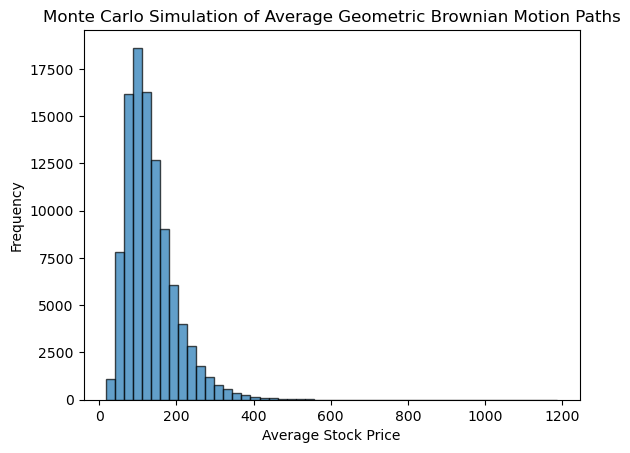

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion(T=1, N=1000, mu=0.1, sigma=0.2, S0=100):
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # standard Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # geometric Brownian motion
    return S

def simulate_paths_and_average(num_paths=100, T=1, N=1000, mu=0.1, sigma=0.2, S0=100, T1=0.2, T2=0.8):
    paths = np.zeros((num_paths, N))
    for i in range(num_paths):
        paths[i] = geometric_brownian_motion(T, N, mu, sigma, S0)
    T1_index = int(T1 * N / T)
    T2_index = int(T2 * N / T)
    average_paths = np.mean(paths[:, T1_index:T2_index], axis=1)
    return average_paths


num_paths = 100000  # number of paths
T = 2.0  # total time
N = 1000  # number of steps
mu = 0.2  # drift
sigma = 0.4  # volatility
S0 = 100  # initial stock price
T1 = 1.0  # start time for averaging
T2 = 1.9  # end time for averaging

# Perform Monte Carlo simulation
mc_results = simulate_paths_and_average(num_paths, T, N, mu, sigma, S0, T1, T2)

# Plot the result
plt.hist(mc_results, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Average Stock Price')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Average Geometric Brownian Motion Paths')
plt.show()

In [63]:
np.mean(mc_results) * np.exp(-mu*T2)

91.48419363074888

In [64]:
S0/mu/(T2-T1)*(1-np.exp(mu*(T1-T2)))

91.51654921596001